In [53]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

plt.style.use('ggplot')    # стиль графиков

In [54]:
%matplotlib inline

In [55]:
df = pd.read_excel(r"C:\Users\Пользователь\Downloads\Telegram Desktop\data_matstat_K5.xls", sheet_name="B - bodyfat")

In [56]:
df

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17,B18
0,1.0708,12.3,normal,23,Male,Somerville,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,low,22,Male,Somerville,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,high,22,Male,Somerville,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,normal,26,Male,Somerville,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,high,24,Male,Somerville,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,normal,70,Male,Revere,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,high,72,Female,Revere,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,high,72,Female,Revere,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,high,72,Female,Revere,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [57]:
df.B12.shape

(252,)

In [58]:
m = df.B12.mean()
m

99.9047619047619

In [59]:
df.B12.var()

51.32372225384178

In [60]:
s = df.B12.std()
s

7.164057666842289

In [61]:
df.B12.skew() #ассимерия

1.4971273119966988

In [62]:
df.B12.kurtosis() #экцесс

7.4713521085780314

In [63]:
n = len(df.B12)

In [65]:
#БДЗ 2
#доверительный интервал для мат ожидания

quantile_1 = 0.01
quantile_2 = 0.05
quantile_3 = 0.1
t_rv = stats.t(n-1)

a = m - (s * t_rv.ppf(1 - quantile_1 / 2)) / n**(1/2)
b = m + (s * t_rv.ppf(1 - quantile_1 / 2)) / n**(1/2)

print("a = %.3f; b = %.3f" % (a, b))

a = 98.733; b = 101.076


In [67]:
#БДЗ 2
#доверительный интервал для дисперсии

quantile_1 = 0.01
quantile_2 = 0.05
quantile_3 = 0.1
f_rv = stats.chi2(n-1)

a = ((n-1) * (s**2)) / f_rv.ppf(1 - quantile_1 / 2)
b = ((n-1) * (s**2)) / f_rv.ppf(quantile_1 / 2)

print("a = %.3f; b = %.3f" % (a, b))

a = 41.228; b = 65.377


In [69]:
#БДЗ 2
#доверительный интервал для разности мат ожиданий
n1 = len(df.B10)
n2 = len(df.B11)
s1 = df.B10.std()
s2 = df.B11.std()
m1 = df.B10.mean()
m2 = df.B11.mean()

s = (((n1 - 1)*(s1**2) + (n2 - 1)*(s2**2))/(n1 + n2 - 2))**(1/2)
t_rv = stats.t(n1 + n2 - 2)
a = (m1 - m2) - t_rv.ppf(1 - quantile_1 / 2) * s * (((1/n1) + (1/n2))**(1/2))
b = (m1 - m2) + t_rv.ppf(1 - quantile_1 / 2) * s * (((1/n1) + (1/n2))**(1/2))

print("a = %.3f; b = %.3f" % (a, b))
m1 - m2

a = 6.039; b = 10.498


8.268253968253973

In [71]:
#БДЗ 2
#доверительный интервал для отношения дисперсий

n1 = len(df.B10)
n2 = len(df.B11)
s1 = df.B10.std()
s2 = df.B11.std()

fh_rv = stats.f(n2-1,n1-1)

a = ((s1**2) * fh_rv.ppf(quantile_1 / 2))/ (s2**2)
b = ((s1**2) * fh_rv.ppf(1 - quantile_1 / 2))/ (s2**2)

print("a = %.3f; b = %.3f" % (a, b))


a = 0.441; b = 0.847


In [40]:
k = math.ceil(1 + math.log2(n))
m = df.B10.min()
print(k,m)

9 79.3


In [41]:
df_1 =  pd.cut(df['B10'], bins=9).value_counts(sort=False).values # частота
df_1

array([ 3, 27, 69, 80, 42, 19, 10,  1,  1], dtype=int64)

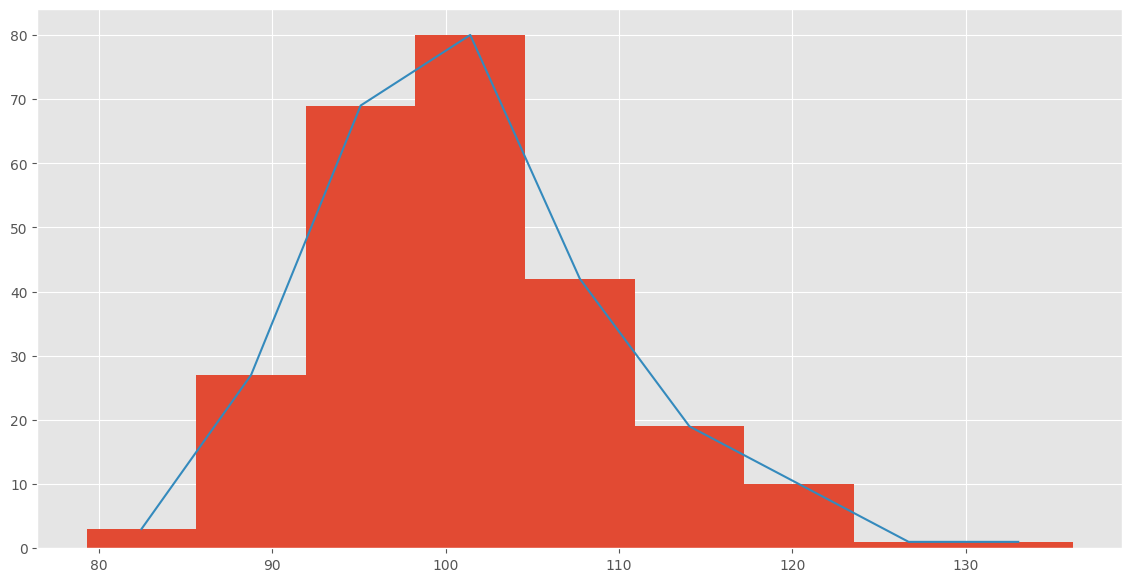

In [42]:
#frequency polygon

plt.figure(figsize=(14,7))

count,division = np.histogram(df['B10'], bins=9)
ar = []
for i in range(len(division)-1):
  ar.append(((division[i + 1] - division[i]) / 2) + division[i])

df['B10'].hist(bins=k, density=False)
plt.plot(ar, count)

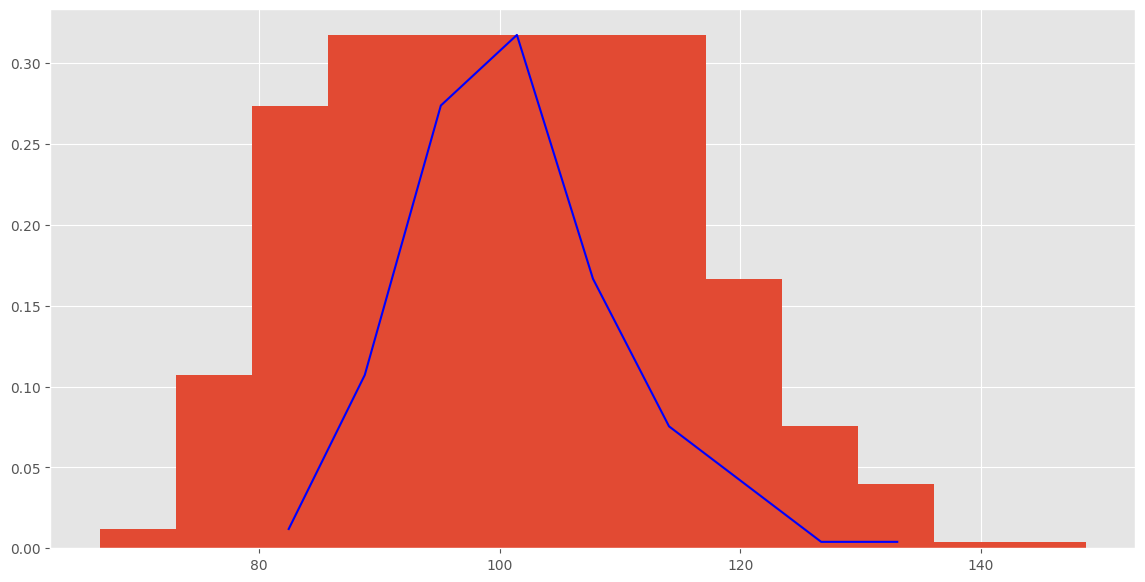

In [43]:
#Histogram and polygon of relative frequencies
plt.figure(figsize=(14,7))
y = pd.cut(df['B10'], bins=9).value_counts(sort=False, normalize = True).values
plt.bar(ar, y, width = 31.4)
plt.plot(ar, y, color="blue")

In [44]:
y

array([0.01190476, 0.10714286, 0.27380952, 0.31746032, 0.16666667,
       0.07539683, 0.03968254, 0.00396825, 0.00396825])

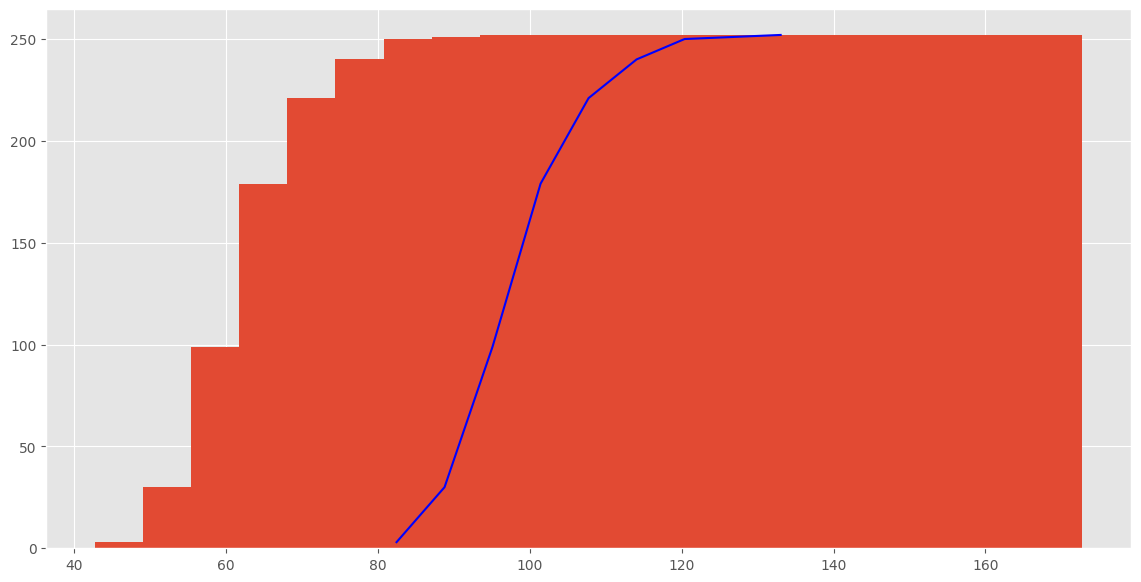

In [45]:
#Гистограмма и полигон накопленных частот

plt.figure(figsize=(14,7))
y1 = pd.cut(df['B10'], bins=9).value_counts(sort=False).cumsum()
plt.bar(ar, y1, width = 79.3)
plt.plot(ar, y1, color="blue")


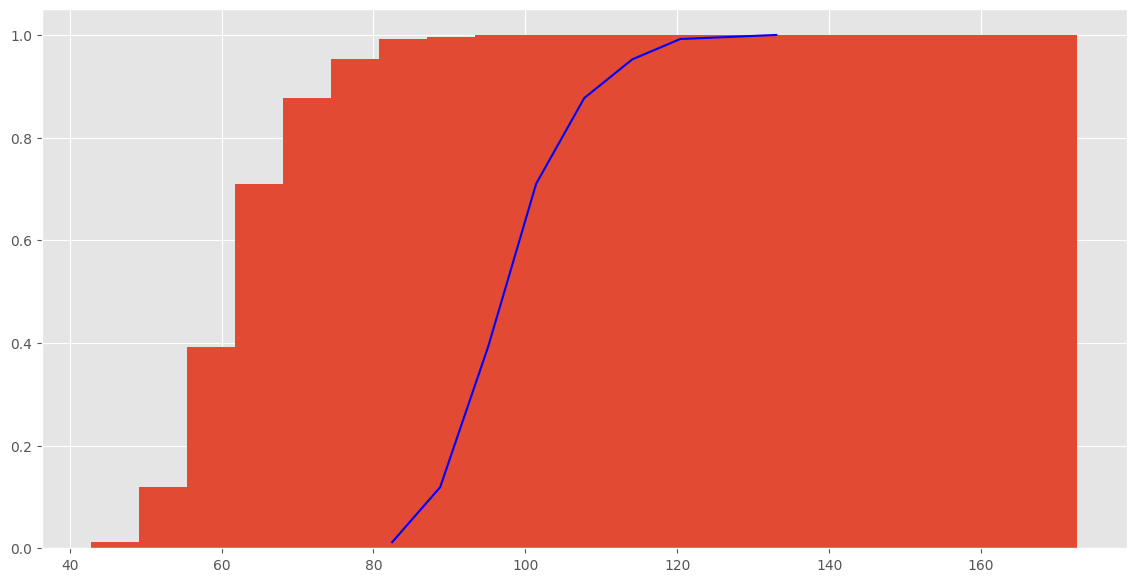

In [46]:
#Гистограмма и полигон накопленных относительных частот
plt.figure(figsize=(14,7))
y2 = pd.cut(df['B10'], bins=9).value_counts(sort=False, normalize = True).values.cumsum()
plt.bar(ar, y2, width = 79.3)
plt.plot(ar, y2, color="blue")

In [47]:
df_1 =  pd.cut(df['B10'], bins=9).value_counts(sort=False).values.cumsum() #накопленная частота
df_1

array([  3,  30,  99, 179, 221, 240, 250, 251, 252], dtype=int64)

In [48]:
df_1 =  pd.cut(df['B10'], bins=9).value_counts(sort=False, normalize = True).values.cumsum() #накопленная относительная частота
df_1

array([0.01190476, 0.11904762, 0.39285714, 0.71031746, 0.87698413,
       0.95238095, 0.99206349, 0.99603175, 1.        ])

In [49]:
pd.cut(df['B10'], bins=9).value_counts(sort=False, normalize = True) #относителная частота

B10
(79.243, 85.622]      0.011905
(85.622, 91.944]      0.107143
(91.944, 98.267]      0.273810
(98.267, 104.589]     0.317460
(104.589, 110.911]    0.166667
(110.911, 117.233]    0.075397
(117.233, 123.556]    0.039683
(123.556, 129.878]    0.003968
(129.878, 136.2]      0.003968
Name: proportion, dtype: float64

In [50]:
pd.cut(df['B10'], bins=9)

0        (91.944, 98.267]
1        (91.944, 98.267]
2        (91.944, 98.267]
3       (98.267, 104.589]
4        (91.944, 98.267]
              ...        
247      (85.622, 91.944]
248    (104.589, 110.911]
249    (110.911, 117.233]
250    (104.589, 110.911]
251    (110.911, 117.233]
Name: B10, Length: 252, dtype: category
Categories (9, interval[float64, right]): [(79.243, 85.622] < (85.622, 91.944] < (91.944, 98.267] < (98.267, 104.589] ... (110.911, 117.233] < (117.233, 123.556] < (123.556, 129.878] < (129.878, 136.2]]

Text(0, 0.5, 'Frequency of student')

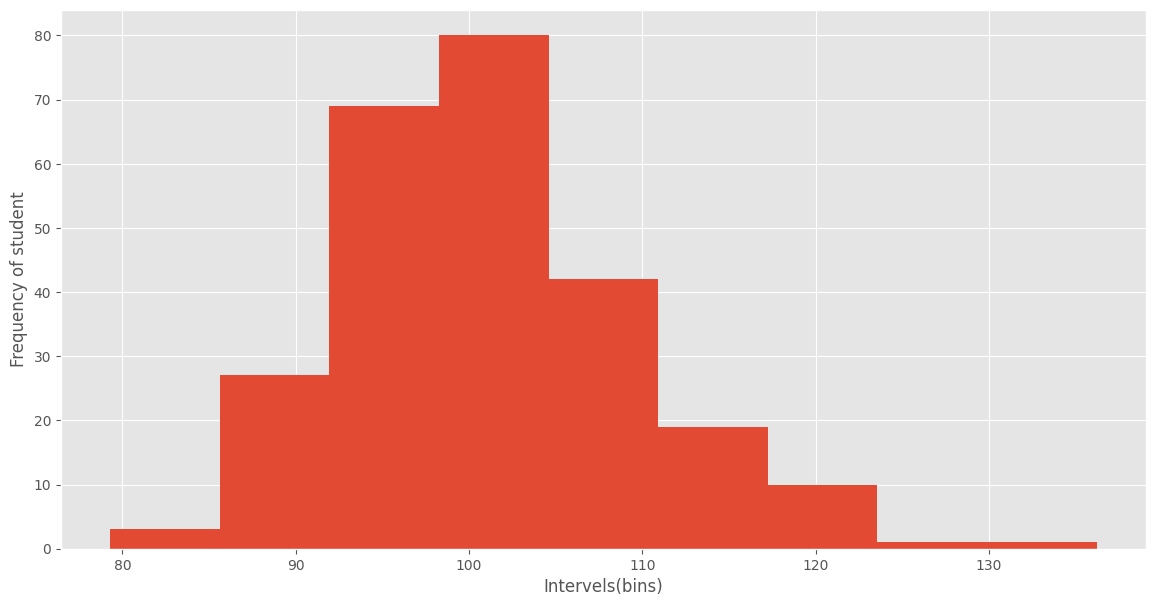

In [51]:
plt.figure(figsize=(14,7))
df['B10'].hist(bins=k, density=False)

plt.xlabel("Intervels(bins)")
plt.ylabel("Frequency of student")

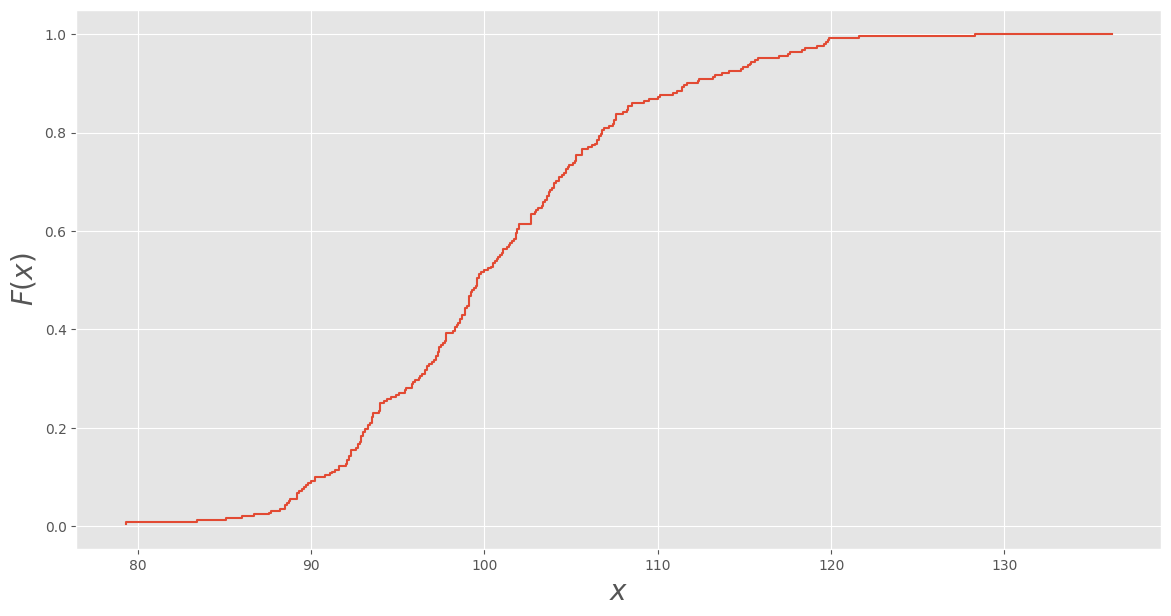

In [52]:
#Эмпирическая функция распределения
plt.figure(figsize=(14,7))

from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(df['B10'])   # строим эмпирическую функцию по выборке

plt.step(ecdf.x, ecdf.y, label='empirical CDF')
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);